**Problem Statement:**

#### * Census-income data plays the most important role in the democratic system of government, highly affecting the economic sectors. Census-related figures are used to allocate federal funding by the government to different states and localities.

#### * Census data is also used for post census residents estimates and predictions, economic and social science research, and many other such applications. Therefore, the importance of this data and its accurate predictions is very clear to us. 
The main aim is to increase awareness about how the income factor actually has an impact not only on the individual lives of citizens but also an effect on the nation and its betterment. You will have a look at the data pulled out from the 1994 Census bureau database, and try **`to find insights into how various features have an effect on the income of an individual.`**

#### * The data contains approximately 32,000 observations with over 15 variables.



#### `The strategy is to analyze the data and perform a predictive task of classification to predict whether an individual makes` 


#### `over 50K a year or less by using a logistic regression algorithm.`



In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", color_codes=True, font_scale=1)
# sns.set_style('white')
sns.set_palette('deep')

In [57]:
main_df=pd.read_csv('census-income .csv',na_values='?',skipinitialspace=True)


In [82]:
df=main_df.copy()
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       30725 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      30718 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  31978 non-null  object
 14  annual_income   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [84]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
annual_income        0
dtype: int64

In [85]:
df.dropna(inplace=True)

In [86]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
annual_income     0
dtype: int64

In [87]:
df.duplicated().sum()
df.drop_duplicates(inplace=True)
df.duplicated().sum()


0

In [88]:
from sklearn.preprocessing import LabelEncoder

le=LabelEncoder()

for col in df.columns:
    if df[col].dtype=='object':
        df[col]=le.fit_transform(df[col].astype(str))

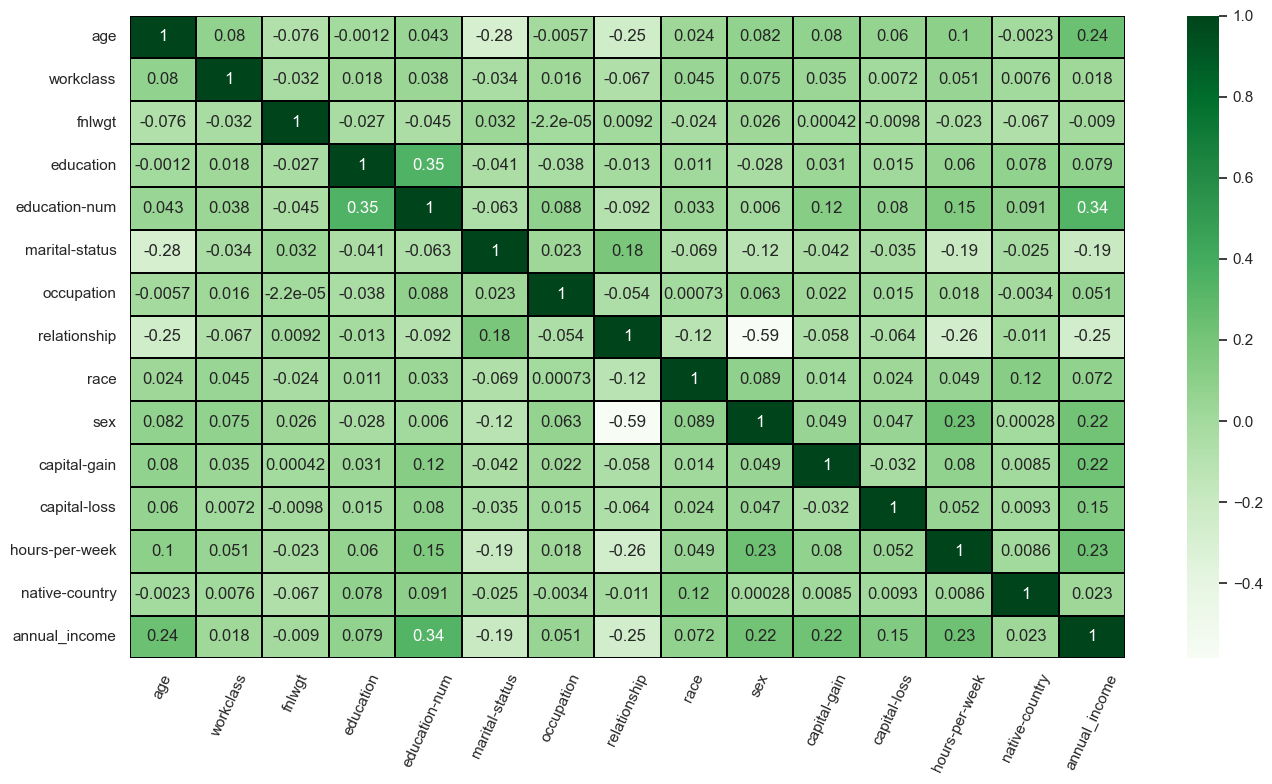

In [89]:
df_corr=df.select_dtypes(include='number').corr()

plt.figure(figsize=(14,8))
sns.heatmap(df_corr,annot=True,cmap='Greens',linewidth=0.05,linecolor='black')

plt.xticks(rotation=65)

plt.tight_layout();

#### <div class = "alert alert-block alert-info"> `We can see that education-num is highest correlated, followed by age, hours-per-week with anual income.`

#### <div class = "alert alert-block alert-danger"> `Less correlated or negligible are fnlwgt, workclass,maarital-status, relationship, race,native_country so lets drop these cols`

In [90]:
X=df.drop(columns='annual_income')
y=df[['annual_income']]

In [91]:
from sklearn.model_selection import train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(X,y,test_size=0.30,random_state=0)



In [92]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

Xtrain = pd.DataFrame(scaler.fit_transform(Xtrain), columns = X.columns)

Xtest = pd.DataFrame(scaler.transform(Xtest), columns = X.columns)

In [93]:
from sklearn.linear_model import LogisticRegression

model=LogisticRegression()
model.fit(Xtrain,ytrain)

C:\Users\moham\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [94]:
predict=model.predict(Xtest)
predict

array([0, 0, 0, ..., 0, 0, 0])

In [95]:
ytest

,annual_income
5161,0
32031,0
17545,0
3383,0
22961,0
...,...
13559,0
16508,0
9287,0
8843,0


In [96]:
new_df=pd.DataFrame({'Actual_values':np.array(ytest).flatten(),'Predicted_values':predict})
new_df

,Actual_values,Predicted_values
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
9037,0,0
9038,0,0
9039,0,0
9040,0,0


In [97]:
from sklearn.metrics import accuracy_score

accuracy_score(ytest,predict)*100

81.79606281796062

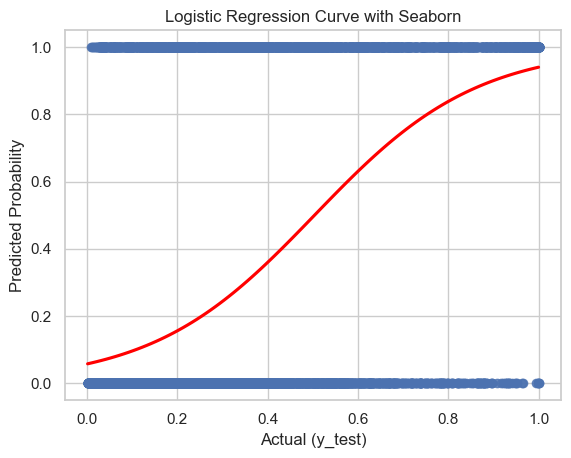

In [98]:

y_prob = model.predict_proba(Xtest)[:, 1]

sns.regplot(x=y_prob, y=ytest, logistic=True, ci=None, line_kws={"color": "red"})
plt.xlabel("Actual (y_test)")
plt.ylabel("Predicted Probability")
plt.title("Logistic Regression Curve with Seaborn")
plt.show()

**Specificity** in logistic regression refers to the model's ability to correctly identify **negative cases** (i.e., those that do not belong to the positive class). It is defined as:


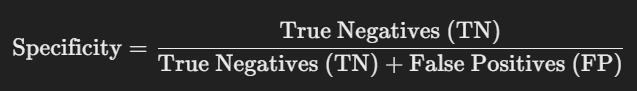




In [99]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(ytest,predict)
cm

array([[6336,  456],
       [1190, 1060]], dtype=int64)

In [100]:
specificity=1098/(1098+403)
specificity

0.7315123251165889

The **F1-score** is a performance metric used to evaluate the accuracy of a classification model. It is particularly useful when you have imbalanced datasets, as it balances **precision** and **recall** in its calculation.


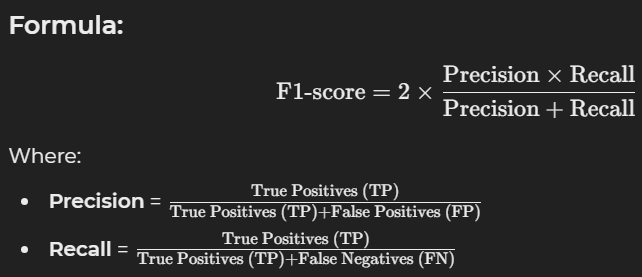



### Key Points:
- The F1-score ranges from **0 to 1**:
  - **1** means perfect precision and recall.
  - **0** means the model failed completely.
- It gives equal importance to precision and recall.

### When to Use:
- Use the F1-score when:
  - False positives and false negatives carry a similar cost.
  - The dataset is **imbalanced** (e.g., one class is much more frequent than another).


```

In [110]:
precision=cm[0][0]/(cm[0][0]+cm[0][1])
precision

0.9328621908127208

In [111]:
recall=cm[0][0]/(cm[0][0]+cm[1][1])
recall

0.856679286100595

In [112]:
f1_score=2*((precision*recall)/(precision+recall))
f1_score

0.89314914011841

### Confusion Matrix
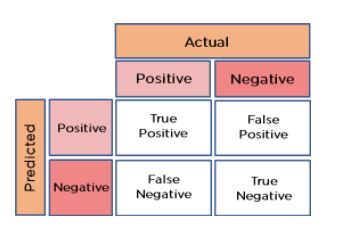

<div class="alert alert-block alert-success">
    <b>
      * <code> True Positive:</code> The number of times our actual positive values are equal to the predicted positive. You predicted a positive value, and it is correct.
    <br>
    * <code>False Positive:</code> The number of times our model wrongly predicts negative values as positives. You predicted a negative value, and it is actually positive.
        <br>
    * <code>True Negative</code>: The number of times our actual negative values are equal to predicted negative values. You predicted a negative value, and it is actually negative.
            <br>
    * <code>False Negative:</code> The number of times our model wrongly predicts negative values as positives. You predicted a negative value, and it is actually positive. 
        </b>
 </div>

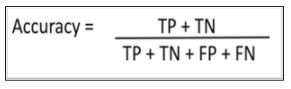

### **Relation Between Sensitivity and Specificity**

**Sensitivity** and **Specificity** are two fundamental performance metrics for classification models, especially in binary classification tasks, such as in **logistic regression**. Both metrics are related to the model's ability to classify instances correctly but measure different aspects of classification performance. Here's a detailed look at the relationship:

### 1. **Definitions:**
- **Sensitivity** (also called **Recall** or **True Positive Rate**) measures the proportion of actual positive cases (True Positives, **TP**) that are correctly identified by the model.
  
  $$
  \text{Sensitivity (Recall)} = \frac{TP}{TP + FN}
  $$
  Where:
  - **TP** = True Positives
  - **FN** = False Negatives

- **Specificity** (also called **True Negative Rate**) measures the proportion of actual negative cases (True Negatives, **TN**) that are correctly identified by the model.
  

  $$
  \text{Specificity} = \frac{TN}{TN + FP}
  $$
  
  Where:
  - **TN** = True Negatives
  - **FP** = False Positives

### 2. **Complementary Metrics:**
- **Sensitivity** focuses on the **positives**, i.e., how well the model identifies positive cases. A **high sensitivity** means fewer **False Negatives (FN)**.
  
- **Specificity** focuses on the **negatives**, i.e., how well the model identifies negative cases. A **high specificity** means fewer **False Positives (FP)**.

These two metrics are related but **complementary** because improving one can often lead to a decrease in the other, especially in imbalanced datasets.

### 3. **Trade-Off Between Sensitivity and Specificity:**
- **Trade-off**: `Increasing sensitivity (i.e., minimizing False Negatives) typically lowers specificity (i.e., increasing False Positives), and vice versa.`
  - For example, if you adjust the classification threshold to make the model more **sensitive** (e.g., by classifying more cases as positive), it may also incorrectly classify some negative cases as positive, thus lowering specificity.
  
- **Threshold Adjustment**: This trade-off can be controlled by adjusting the decision threshold in binary classification:
  - A **lower threshold** increases sensitivity but decreases specificity (more positives, more false positives).
  - A **higher threshold** increases specificity but decreases sensitivity (more negatives, more false negatives).

### 4. **Impact of Imbalanced Data:**
- In imbalanced datasets (where one class is much more prevalent than the other), optimizing sensitivity or specificity can affect the model's overall performance. In such cases, using a combined metric like the **F1 score** or **ROC-AUC** can be helpful.

### 5. **Other Metrics Related to Sensitivity and Specificity:**
- **Precision**: How many of the predicted positives are actually true positives.
  $$
  \text{Precision} = \frac{TP}{TP + FP} 
  $$
- **F1 Score**: The harmonic mean of precision and recall (sensitivity):
  $$
  F1 = 2 \times \frac{\text{Precision} \times \text{Sensitivity}}{\text{Precision} + \text{Sensitivity}} 
  $$
- **ROC Curve (Receiver Operating Characteristic)**: Plots sensitivity vs. (1 - specificity), showing the trade-off between true positive rate and false positive rate across different thresholds.

---

### **Summary:**
- **Sensitivity** and **Specificity** measure different aspects of classification performance, and there is often a **trade-off** between them.
- **Sensitivity** is about minimizing False Negatives (how many actual positives are missed), and **Specificity** is about minimizing False Positives (how many actual negatives are misclassified as positive).
- These metrics are complementary but can be adjusted by modifying the classification threshold, depending on the problem's requirements (e.g., prioritizing fewer false positives or fewer false negatives). 

In practice, these two metrics are often used together to understand the overall effectiveness of a classifier.

<Axes: >

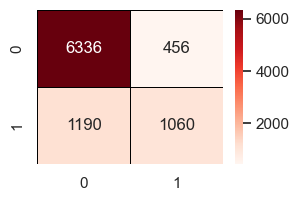

In [101]:
plt.figure(figsize=(3,2))
sns.heatmap(cm,annot=True,cmap="Reds",fmt='d',linewidths=0.5,linecolor='black')

In [102]:
main_df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K


In [103]:
main_df['workclass'].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', nan, 'Self-emp-inc', 'Without-pay', 'Never-worked'],
      dtype=object)

In [104]:
df.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual_income
0,39,5,77516,9,13,4,0,1,4,1,2174,0,40,38,0
1,50,4,83311,9,13,2,3,0,4,1,0,0,13,38,0


In [105]:
df[(df['annual_income']=='<=50K') | (df['hours-per-week']>=40)].count()

age               23431
workclass         23431
fnlwgt            23431
education         23431
education-num     23431
marital-status    23431
occupation        23431
relationship      23431
race              23431
sex               23431
capital-gain      23431
capital-loss      23431
hours-per-week    23431
native-country    23431
annual_income     23431
dtype: int64

In [108]:
class_counts = df['annual_income'].value_counts()

# Print class-wise support
print("Class-wise Support:")
print(class_counts)

# Total support value
total_support = class_counts.sum()
print("\nTotal Support Value:", total_support)

Class-wise Support:
annual_income
0    22633
1     7506
Name: count, dtype: int64

Total Support Value: 30139


The **AUC-ROC plot** (Receiver Operating Characteristic curve) is used to evaluate the performance of a binary classification model. In this plot, the **X-axis** and **Y-axis** represent specific metrics that help visualize the trade-off between true positive rate (sensitivity) and false positive rate (1 - specificity) across different thresholds.

### **X-axis**: 
- **False Positive Rate (FPR)** or **1 - Specificity**
- This represents the proportion of actual **negatives** that are incorrectly classified as positive by the model.
  
  $$
  \text{FPR} = \frac{FP}{FP + TN}
  $$
  Where:
  - **FP** = False Positives
  - **TN** = True Negatives

### **Y-axis**:
- **True Positive Rate (TPR)** or **Sensitivity** or **Recall**
- This represents the proportion of actual **positives** that are correctly identified as positive by the model.
  
  $$
  \text{TPR} = \frac{TP}{TP + FN}
  $$
  Where:
  - **TP** = True Positives
  - **FN** = False Negatives

### **AUC (Area Under the Curve)**:
- The **AUC** measures the overall performance of the model. It is the area under the ROC curve, with values between 0 and 1. The higher the AUC, the better the model:
  - **AUC = 1**: Perfect model.
  - **AUC = 0.5**: Model performs no better than random guessing.
  - **AUC < 0.5**: The model is worse than random guessing.


### **Explanation:**
1. **`roc_curve()`**: This function computes the **FPR** and **TPR** values across different classification thresholds.
2. **`auc()`**: Calculates the **AUC** by integrating the ROC curve.
3. **Plot**: The curve is plotted with **FPR** on the X-axis and **TPR** on the Y-axis.

### **Interpretation**:
- The **X-axis** (FPR) shows how many false positives are occurring at different thresholds.
- The **Y-axis** (TPR) shows the true positive rate at those same thresholds.

The area under the ROC curve (AUC) gives an overall idea of how well the model distinguishes between the two classes.